# Assignment 2

This projecct is inspired by applied data visualization course from University of Michigan on Coursera.com

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import mplleaflet
import pandas as pd
from datetime import datetime
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
#set number of rows/columns displayed by dataframe
pd.options.display.max_rows = 999
pd.options.display.max_columns = 20

In [3]:
%matplotlib notebook

In [4]:

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#Skip leap day 
df = df[(~df['Date'].str.match(r'\d*-02-29'))]
df['Year'] = df['Date'].str.split('-',1).apply(lambda x: x[0])
df['MonthDay'] = df['Date'].str.split('-',1).apply(lambda x: x[1])
#select 2005-2014 data
high_group = df[(df['Element']=='TMAX')&(df['Year'] >= '2005')&  (df['Year'] <= '2014')].groupby(['MonthDay']).max()
low_group = df[(df['Element']=='TMIN')&(df['Year'] >= '2005')&  (df['Year'] <= '2014')].groupby(['MonthDay']).min()
#select 2015 data
high_group_15 = df[(df['Element']=='TMAX')&(df['Year'] == '2015')].groupby(['MonthDay']).max()
low_group_15 = df[(df['Element']=='TMIN')&(df['Year'] == '2015')].groupby(['MonthDay']).min()
#merge dataframes
df_n = pd.merge(high_group,low_group,left_index=True, right_index=True)
df_n15 = pd.merge(high_group_15,low_group_15,left_index=True, right_index=True)


In [61]:
#select data where 2015 temperature break the 2005-2014 record
broken_high = np.where(high_group_15['Data_Value'] > high_group['Data_Value'])
broken_low = np.where(low_group_15['Data_Value'] < low_group['Data_Value'])
#select data to generate line graphs
data_high = (df_n.loc[:,'Data_Value_x']/10)
date = df_n.reset_index().loc[:,'MonthDay'].apply(lambda x: datetime.strptime(x,'%m-%d'))
data_low = (df_n.loc[:,'Data_Value_y']/10)
#select data to generate scatter plots
data_high_broken = df_n15.iloc[broken_high].loc[:,'Data_Value_x']/10
data_low_broken = df_n15.iloc[broken_low].loc[:,'Data_Value_y']/10

<IPython.core.display.Javascript object>


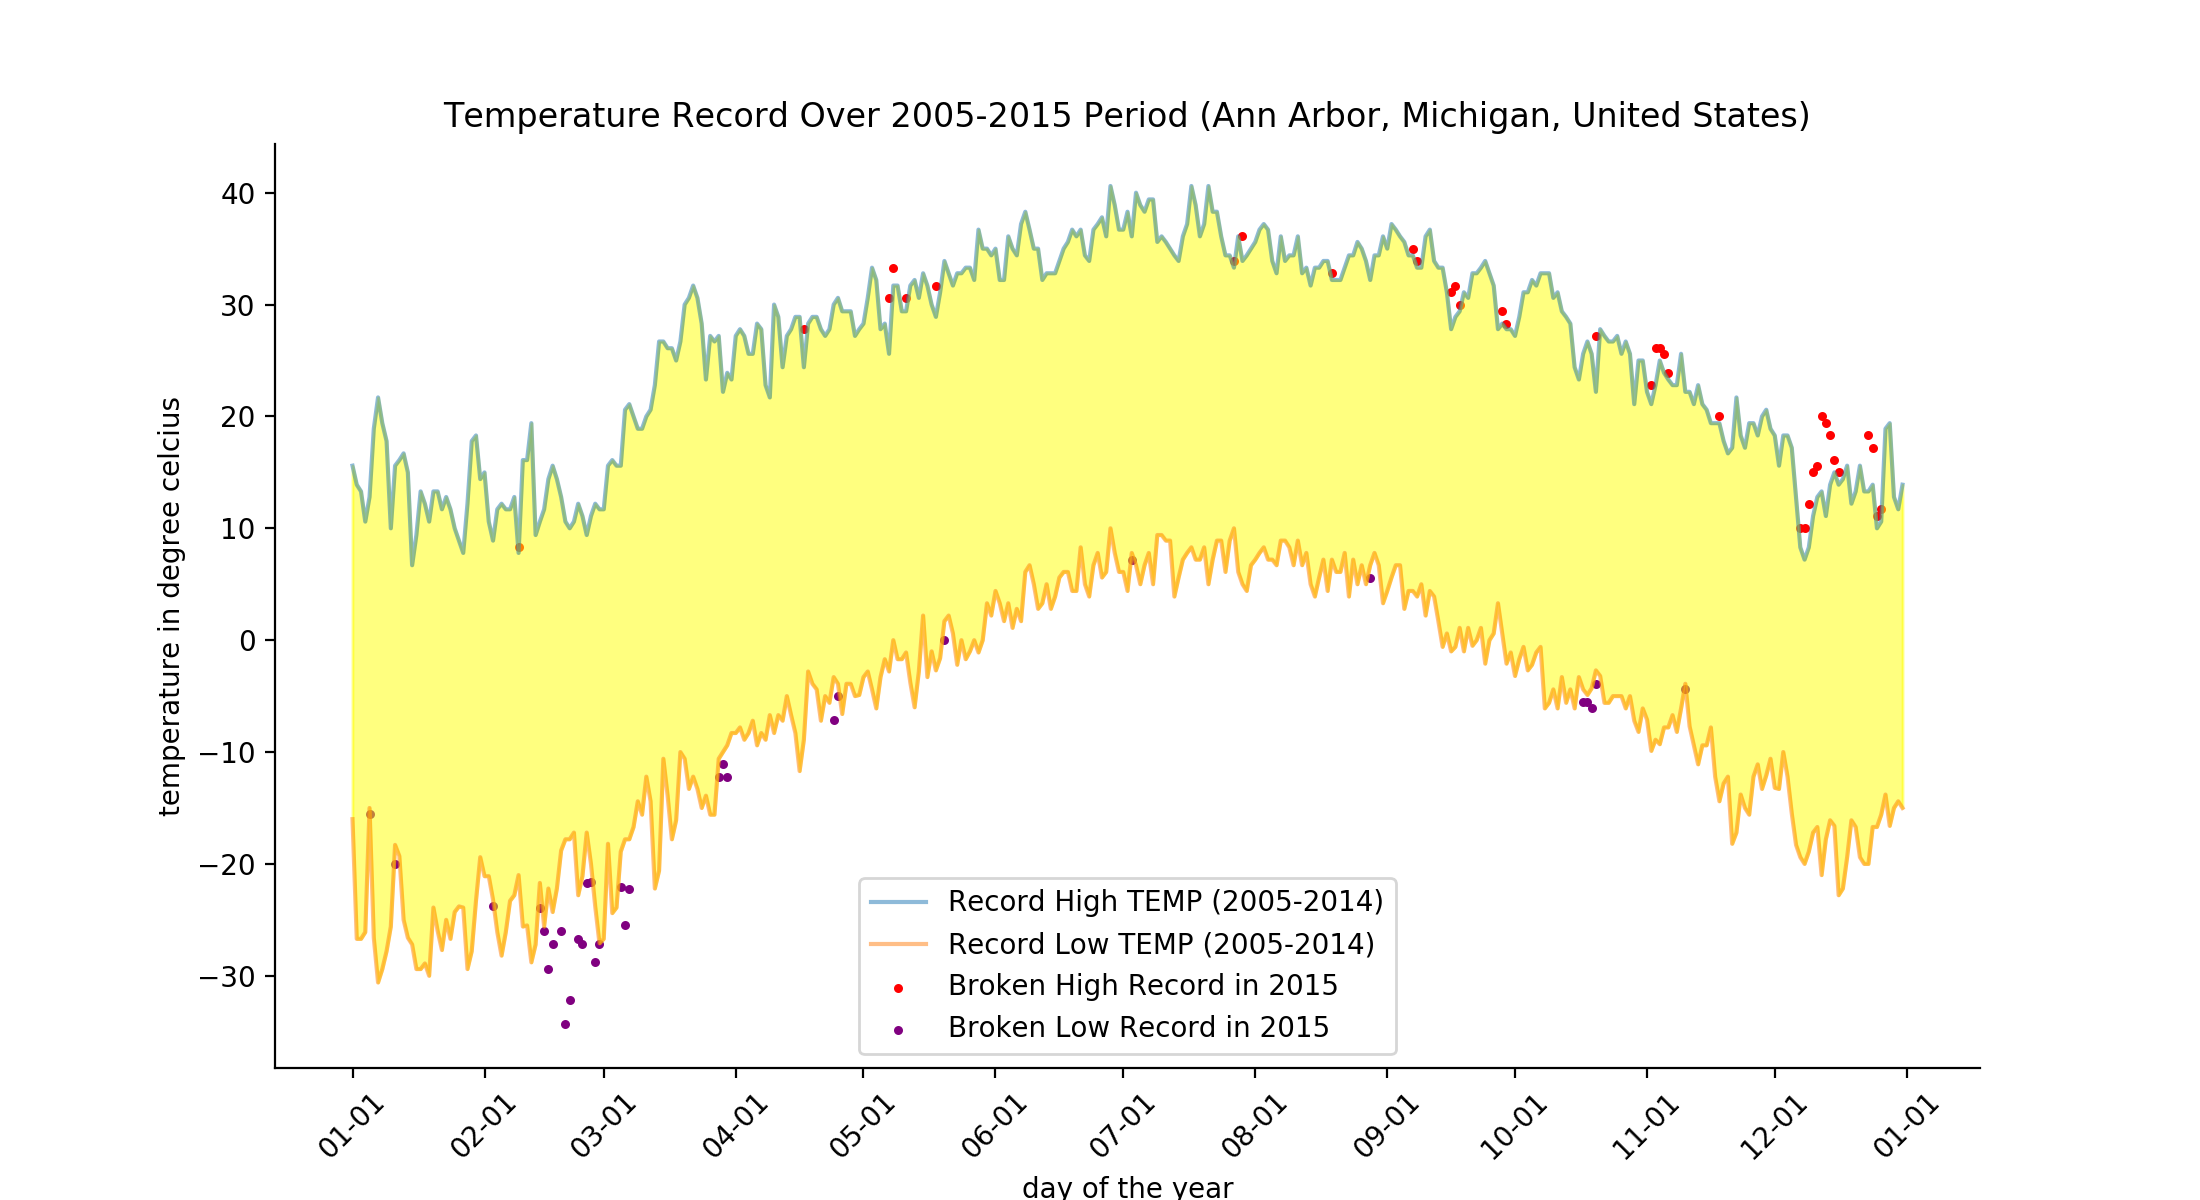

In [58]:
plt.figure(figsize=(11,6))
#adding line plots
plt.plot(date,data_high,label='Record High TEMP (2005-2014)', alpha = 0.5)
plt.plot(date,data_low, label = 'Record Low TEMP (2005-2014)', alpha = 0.5)

#adding scatter plots 
high_x = date.iloc[broken_high]
low_x = date.iloc[broken_low]
plt.scatter(list(high_x), data_high_broken, s=5,c='red',label = 'Broken High Record in 2015' )
plt.scatter(list(low_x), data_low_broken, s=5,c='purple',label = 'Broken Low Record in 2015' )

#shading areas between two line
ax = plt.gca()
ax.fill_between(date.values,data_high,data_low,color='yellow',alpha = 0.5)
#formatting x-axis
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d"))
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
plt.xticks(rotation =45)

#add a title
plt.title('Temperature Record Over 2005-2015 Period (Ann Arbor, Michigan, United States)')

#add labels
plt.xlabel('day of the year')
plt.ylabel('temperature in degree celcius')

#add legends
plt.legend()

#
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spine['']